# IO

In [1]:
import PineBioML.IO as IO

In [2]:
# example_PipeLine.py ./input/ example_data.xlsx 0 y

data = IO.read_file("./input/HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

# Train test split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True)

# Data Overview

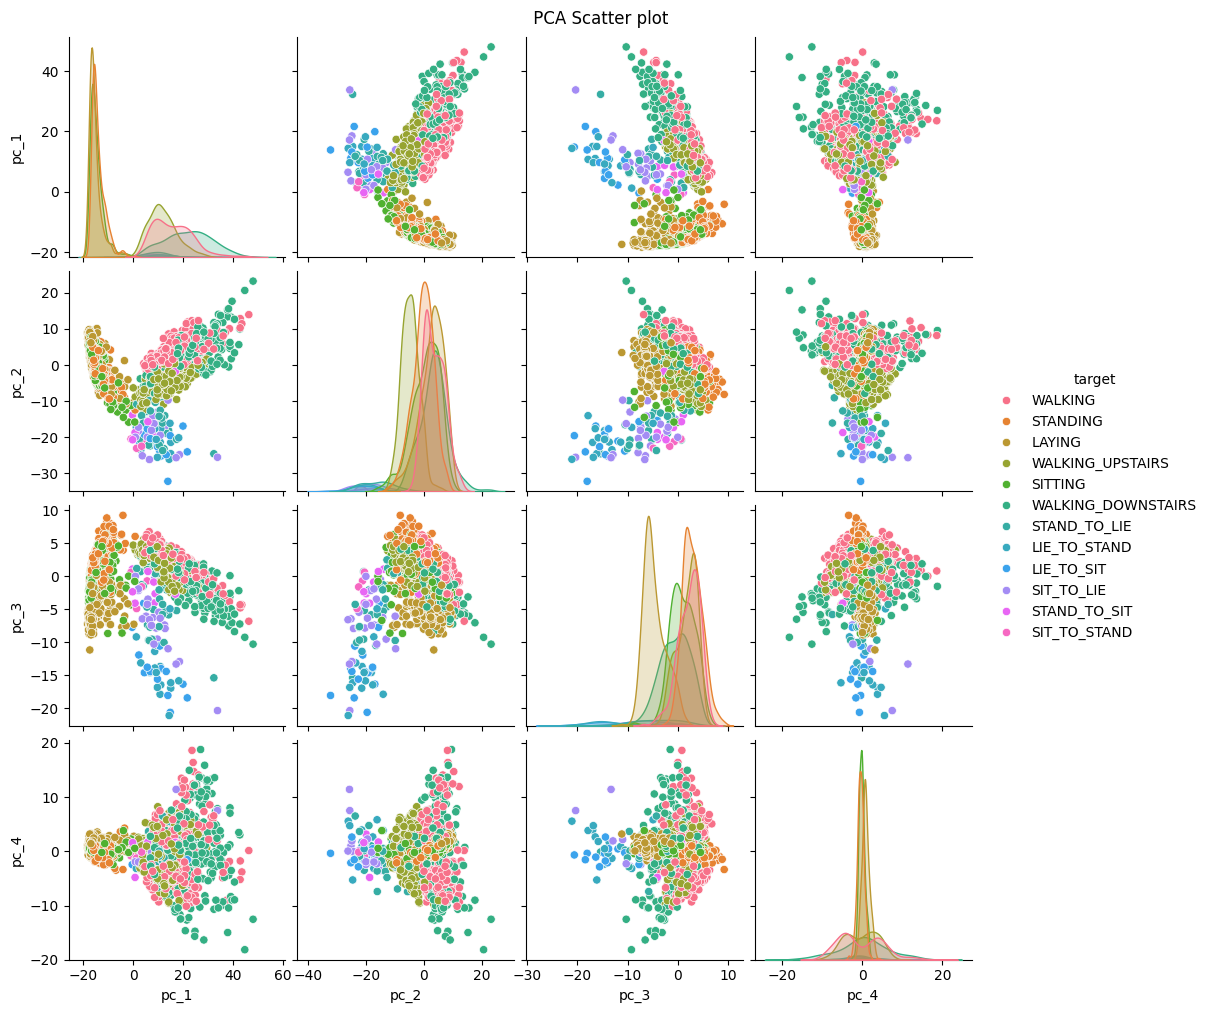

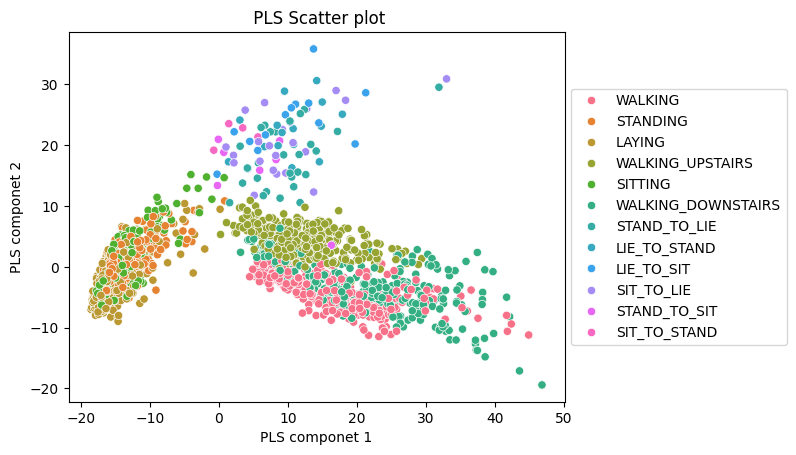

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


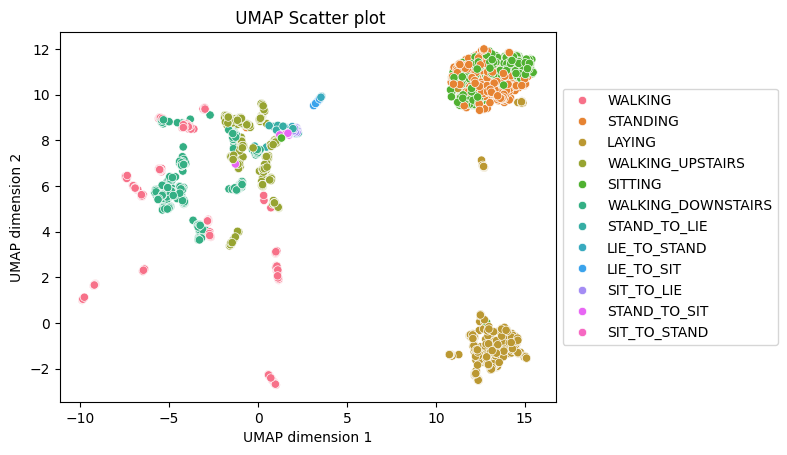

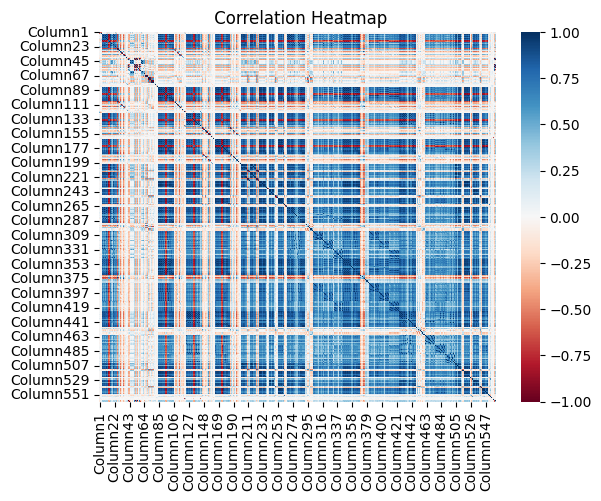

In [4]:
from PineBioML.report.utils import data_overview
data_overview(x_train, y_train, show_fig = True)

# Modeling

In [5]:
from PineBioML.preprocessing import Normalizer
from PineBioML.preprocessing import impute
from PineBioML.selection.classification import ensemble_selector
import PineBioML.model.supervised.Classification as tuner
from sklearn.pipeline import Pipeline

In [6]:
pipe = Pipeline(
    [
        ("Standarization", Normalizer(method="StandardScaler")),
        ("Missing_Value_Processing", impute.simple_imputer(threshold = 0.6, strategy = "constant")),
        ("Feature_Selection", ensemble_selector(z_importance_threshold = 1)),
        ("Modeling", tuner.RandomForest_tuner(target="f1_macro"))
     ]
)

In [7]:
pipe.fit(x_train, y_train)

Using  c45  to select.


100%|██████████| 561/561 [00:03<00:00, 149.64it/s]


c45  is done. Using 4.0936

Using  RF_gini  to select.
RF_gini  is done. Using 0.9837

Using  Lasso  to select.
Lasso  is done. Using 1.1056

Using  multi_Lasso  to select.
multi_Lasso  is done. Using 3.3551

Using  SVM  to select.
SVM  is done. Using 34.9195

optuna seed 11447  |  validation seed 2599  |  model seed 10110
    RandomForest start tuning. it will take a while.
    optuna is better, best trial:  33


Pipeline(steps=[('Standarization',
                 <PineBioML.preprocessing.Normalizer object at 0x00000206BB4BFD90>),
                ('Missing_Value_Processing',
                 <PineBioML.preprocessing.impute.simple_imputer object at 0x00000206CE460910>),
                ('Feature_Selection',
                 <PineBioML.selection.classification.ensemble_selector object at 0x00000206CE45CED0>),
                ('Modeling',
                 <PineBioML.model.supervised.Classification.RandomForest_tuner object at 0x00000206CE3A0F50>)])

# Evaluation

In [8]:
from PineBioML.report.utils import classification_summary

classification_summary(y_valid, pipe.predict_proba(x_valid), show_fig=False)

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


                   precision    recall  f1-score support
LAYING                   1.0  0.994413  0.997199   179.0
LIE_TO_SIT          0.545455  0.545455  0.545455    11.0
LIE_TO_STAND        0.545455       0.5  0.521739    12.0
SITTING              0.93038   0.97351  0.951456   151.0
SIT_TO_LIE          0.818182       0.9  0.857143    10.0
SIT_TO_STAND             1.0       0.5  0.666667     6.0
STANDING            0.982759  0.934426  0.957983   183.0
STAND_TO_LIE             0.6  0.789474  0.681818    19.0
STAND_TO_SIT        0.583333  0.466667  0.518519    15.0
WALKING             0.965909  0.988372  0.977011   172.0
WALKING_DOWNSTAIRS  0.968504  0.960938  0.964706   128.0
WALKING_UPSTAIRS    0.974684  0.974684  0.974684   158.0
                                                        
macro avg           0.826222  0.793995  0.801198  1044.0
weighted avg        0.948577  0.947318  0.946908  1044.0
accuracy                                0.947318  1044.0


<Figure size 640x480 with 0 Axes>

# Saving Model

In [9]:
# save model
IO.save_model(pipe, "./output/models/", "MostInOne", overide=True)

MostInOne  has already exist in  ./output/models/
It will be overide.


# Reload model

In [10]:
# load model
presaved_model = IO.load_model("./output/models/MostInOne")

c:\Users\aimhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


                   precision    recall  f1-score support
LAYING                   1.0  0.994413  0.997199   179.0
LIE_TO_SIT          0.545455  0.545455  0.545455    11.0
LIE_TO_STAND        0.545455       0.5  0.521739    12.0
SITTING              0.93038   0.97351  0.951456   151.0
SIT_TO_LIE          0.818182       0.9  0.857143    10.0
SIT_TO_STAND             1.0       0.5  0.666667     6.0
STANDING            0.982759  0.934426  0.957983   183.0
STAND_TO_LIE             0.6  0.789474  0.681818    19.0
STAND_TO_SIT        0.583333  0.466667  0.518519    15.0
WALKING             0.965909  0.988372  0.977011   172.0
WALKING_DOWNSTAIRS  0.968504  0.960938  0.964706   128.0
WALKING_UPSTAIRS    0.974684  0.974684  0.974684   158.0
                                                        
macro avg           0.826222  0.793995  0.801198  1044.0
weighted avg        0.948577  0.947318  0.946908  1044.0
accuracy                                0.947318  1044.0


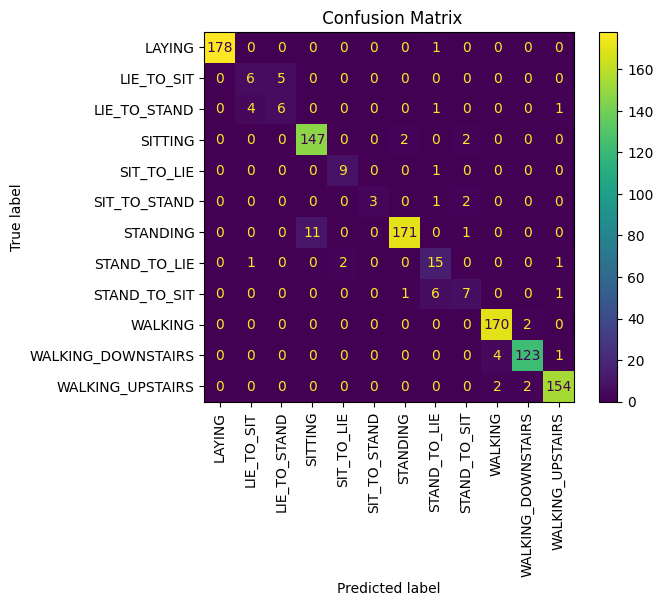

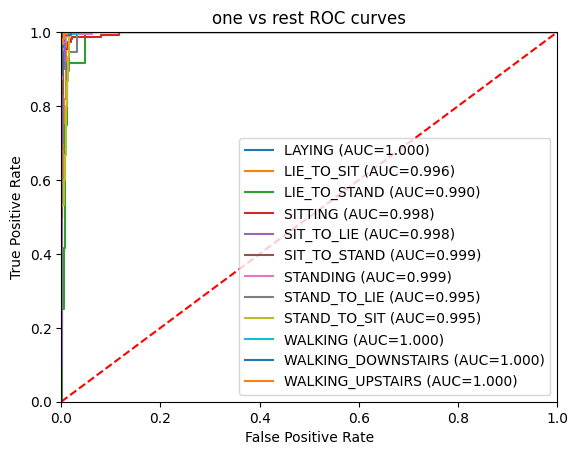

In [11]:
classification_summary(y_valid, presaved_model.predict_proba(x_valid)) 